In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df = pd.read_csv('term-deposit-marketing-2020.csv')

## Read and inspect the data

In [3]:
# Exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [4]:
df.shape

(40000, 14)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [6]:
# Checking for data imbalanced or not
df['y'].value_counts()

y
no     37104
yes     2896
Name: count, dtype: int64

The value 'yes' is almost 8% of the entire target variable 'Y' which shows us that the data set is **moderately imbalanced**. If the model created does not work well and does not generalize then we will go for Sampling techniques. 

In [7]:
## Handling missing data if any

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

As no missing data, no imputation needed.

In [9]:
target = ['y']
X = df[df.columns.difference(target)]
y = df[target]

In [10]:
X.head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month
0,58,2143,1,unknown,5,no,261,tertiary,yes,management,no,married,may
1,44,29,1,unknown,5,no,151,secondary,yes,technician,no,single,may
2,33,2,1,unknown,5,no,76,secondary,yes,entrepreneur,yes,married,may
3,47,1506,1,unknown,5,no,92,unknown,yes,blue-collar,no,married,may
4,33,1,1,unknown,5,no,198,unknown,no,unknown,no,single,may


In [11]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


## EDA

### 1) Data Encoding

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
X.head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month
0,58,2143,1,unknown,5,no,261,tertiary,yes,management,no,married,may
1,44,29,1,unknown,5,no,151,secondary,yes,technician,no,single,may
2,33,2,1,unknown,5,no,76,secondary,yes,entrepreneur,yes,married,may
3,47,1506,1,unknown,5,no,92,unknown,yes,blue-collar,no,married,may
4,33,1,1,unknown,5,no,198,unknown,no,unknown,no,single,may


#### a) Starting with contact

In [14]:
X['contact'].value_counts()

contact
cellular     24914
unknown      12765
telephone     2321
Name: count, dtype: int64

In [15]:
X['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

Here we see that the feature 'contact' is a nominal categorical variable. So we can go ahead with One hot encoding as only 2 columns can be used to represent all values

In [16]:
## Making a function to handle all categorical feature encodings
def encode_and_concat(original_df, feature_to_encode):
    dummies = pd.get_dummies(original_df[[feature_to_encode]], drop_first=False, dtype=int)
    result = pd.concat([original_df, dummies], axis=1).drop([feature_to_encode], axis=1)
    return(result)

In [17]:
X = encode_and_concat(X, 'contact')

In [18]:
X.head()

,age,balance,campaign,day,default,duration,education,housing,job,loan,marital,month,contact_cellular,contact_telephone,contact_unknown
0,58,2143,1,5,no,261,tertiary,yes,management,no,married,may,0,0,1
1,44,29,1,5,no,151,secondary,yes,technician,no,single,may,0,0,1
2,33,2,1,5,no,76,secondary,yes,entrepreneur,yes,married,may,0,0,1
3,47,1506,1,5,no,92,unknown,yes,blue-collar,no,married,may,0,0,1
4,33,1,1,5,no,198,unknown,no,unknown,no,single,may,0,0,1


In [19]:
X['contact_cellular'].value_counts()

contact_cellular
1    24914
0    15086
Name: count, dtype: int64

In [20]:
X['contact_telephone'].value_counts()

contact_telephone
0    37679
1     2321
Name: count, dtype: int64

In [21]:
X['contact_unknown'].value_counts()

contact_unknown
0    27235
1    12765
Name: count, dtype: int64

#### 2) default 

Binary variable so converting False to 0 and True to 1

In [22]:
X['default'].value_counts()

default
no     39191
yes      809
Name: count, dtype: int64

In [23]:
X['default'] = X['default'].map({'yes':1, 'no':0})

In [24]:
X.head()

,age,balance,campaign,day,default,duration,education,housing,job,loan,marital,month,contact_cellular,contact_telephone,contact_unknown
0,58,2143,1,5,0,261,tertiary,yes,management,no,married,may,0,0,1
1,44,29,1,5,0,151,secondary,yes,technician,no,single,may,0,0,1
2,33,2,1,5,0,76,secondary,yes,entrepreneur,yes,married,may,0,0,1
3,47,1506,1,5,0,92,unknown,yes,blue-collar,no,married,may,0,0,1
4,33,1,1,5,0,198,unknown,no,unknown,no,single,may,0,0,1


In [25]:
X['default'].value_counts()

default
0    39191
1      809
Name: count, dtype: int64

#### 3) Education 

Ordinal categorical variable so will be using Label Encoding 

In [26]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [27]:
X['education'] = le_encoder.fit(X['education']).transform(X['education'])

In [28]:
X.head()

,age,balance,campaign,day,default,duration,education,housing,job,loan,marital,month,contact_cellular,contact_telephone,contact_unknown
0,58,2143,1,5,0,261,2,yes,management,no,married,may,0,0,1
1,44,29,1,5,0,151,1,yes,technician,no,single,may,0,0,1
2,33,2,1,5,0,76,1,yes,entrepreneur,yes,married,may,0,0,1
3,47,1506,1,5,0,92,3,yes,blue-collar,no,married,may,0,0,1
4,33,1,1,5,0,198,3,no,unknown,no,single,may,0,0,1


In [29]:
X['education'].value_counts()

education
1    20993
2    11206
0     6270
3     1531
Name: count, dtype: int64

#### 4) housing 

Binary variable so converting no to 0 and yes to 1

In [30]:
X['housing'].value_counts()

housing
yes    24031
no     15969
Name: count, dtype: int64

In [31]:
X['housing'] = X['housing'].map({'yes':1, 'no':0})

In [32]:
X['housing'].value_counts()

housing
1    24031
0    15969
Name: count, dtype: int64

#### 4) job 

Ordinal categorical variable so will be using Label Encoding 

In [33]:
X['job'].value_counts()

job
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: count, dtype: int64

In [34]:
X['job'] = le_encoder.fit(X['job']).transform(X['job'])

In [35]:
X['job'].value_counts()

job
1     9383
4     8166
9     6852
0     4483
7     3910
5     1437
6     1414
2     1405
10    1104
3     1087
8      524
11     235
Name: count, dtype: int64

#### 5) loan

Binary variable so converting no to 0 and yes to 1

In [36]:
X['loan'].value_counts()

loan
no     33070
yes     6930
Name: count, dtype: int64

In [37]:
X['loan'] = X['loan'].map({'yes':1, 'no':0})

In [38]:
X['loan'].value_counts()

loan
0    33070
1     6930
Name: count, dtype: int64

#### 5) marital

In [39]:
X['marital'].value_counts()

marital
married     24386
single      10889
divorced     4725
Name: count, dtype: int64

Here we see that the feature 'marital' is a nominal categorical variable. So we can go ahead with One hot encoding as only 3 columns can be used to represent all values

In [40]:
X = encode_and_concat(X, 'marital')

In [41]:
X.head()

,age,balance,campaign,day,default,duration,education,housing,job,loan,month,contact_cellular,contact_telephone,contact_unknown,marital_divorced,marital_married,marital_single
0,58,2143,1,5,0,261,2,1,4,0,may,0,0,1,0,1,0
1,44,29,1,5,0,151,1,1,9,0,may,0,0,1,0,0,1
2,33,2,1,5,0,76,1,1,2,1,may,0,0,1,0,1,0
3,47,1506,1,5,0,92,3,1,1,0,may,0,0,1,0,1,0
4,33,1,1,5,0,198,3,0,11,0,may,0,0,1,0,0,1


#### 6) month

Ordinal categorical variable so will be using Label Encoding 

In [42]:
X['month'].value_counts()

month
may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: count, dtype: int64

In [43]:
X['month'] = le_encoder.fit(X['month']).transform(X['month'])

In [44]:
X['month'].value_counts()

month
8     13532
5      6380
1      5215
6      4734
9      3598
0      2718
3      2296
4      1176
7       258
10       80
2        13
Name: count, dtype: int64

In [45]:
X.head()

,age,balance,campaign,day,default,duration,education,housing,job,loan,month,contact_cellular,contact_telephone,contact_unknown,marital_divorced,marital_married,marital_single
0,58,2143,1,5,0,261,2,1,4,0,8,0,0,1,0,1,0
1,44,29,1,5,0,151,1,1,9,0,8,0,0,1,0,0,1
2,33,2,1,5,0,76,1,1,2,1,8,0,0,1,0,1,0
3,47,1506,1,5,0,92,3,1,1,0,8,0,0,1,0,1,0
4,33,1,1,5,0,198,3,0,11,0,8,0,0,1,0,0,1


#### 7) Finally also converting y (target variable) to 1 and 0

In [46]:
y.value_counts()

y  
no     37104
yes     2896
Name: count, dtype: int64

In [47]:
y['y'] = y['y'].map({'yes':1, 'no':0})

In [48]:
y.value_counts()

y
0    37104
1     2896
Name: count, dtype: int64

## ML Model Building

As the problem is a classification problem, we start by building baseline models and will decide upon which to proceed with by exploring the results.

In [49]:
## Splitting data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=125)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

classifiers = []

In [51]:
model = LogisticRegression(solver='lbfgs', C=1e4, max_iter=1000, penalty='l2')
classifiers.append(model)
model1 = xgb.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [52]:
training_accuracy = np.empty(6)
test_accuracy = np.empty(6)

result = pd.DataFrame(columns=['training_accuracy', 'test_accuracy'])
for clf in classifiers:
    clf.fit(x_train, y_train)
    training_accuracy = clf.score(x_train, y_train)
    y_pred= clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    model_name = clf.__class__.__name__
    result.loc[model_name] = [training_accuracy, test_accuracy]
result

,training_accuracy,test_accuracy
LogisticRegression,0.933857,0.931917
XGBClassifier,0.978107,0.935583
SVC,0.928357,0.928750
DecisionTreeClassifier,1.000000,0.913667
RandomForestClassifier,0.999964,0.936083


The accuracy scores for above baseline models all seem pretty good as above 93%. So going ahead with **KFold Cross Validation**.

**Model Selection** 
<p>From the above results we see that most of the models are performing pretty well with the accuracies being all over 93%.</p>

So going ahead with **Logistic Regression** as
* it is <u><i>quicker</i></u> - taking less amount of time
* more <u><i>interpretable</i></u> - easier to interpret as a linear model
* <u><i>less complex</i></u> than the decision tree based models. 

In [53]:
# Generate the confusion matrix and classification report
from sklearn.metrics import classification_report

ypred = clf.predict(x_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))


[[10960   173]
 [  594   273]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11133
           1       0.61      0.31      0.42       867

    accuracy                           0.94     12000
   macro avg       0.78      0.65      0.69     12000
weighted avg       0.92      0.94      0.93     12000



### KFold Cross Validation

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_validation = KFold(5)


final_model = LogisticRegression(solver='lbfgs', C=1e4, max_iter=1000, penalty='l2')
results = cross_val_score(final_model, X, y, cv=kfold_validation)
print(results)
print(np.mean(results))

[0.968875 0.9525   0.95425  0.905875 0.881125]
0.932525


#### Success Metric Achieved: 5-fold cross validation should have greater than 81% accuracy: 

The cross validation accuracy is **93.25%** which is almost equal to the training accuracy being **93.19%** which shows that this logistic regression model with l2 regularization is a **great model** as it is generalizing well.

#### Prediction

In [102]:
from sklearn.metrics import accuracy_score
final_model.fit(x_train, y_train)
predictions = final_model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
accuracy


0.9319166666666666

### Bonus(es)

**Goal :** 
<p> We are interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of 
    customers our client should prioritize. What makes the customers buy? Which feature are most important? </p>

**Solution:**

We have a great fitting Logistic regression model with 93.25% accuracy after KFold Validation. The logistic regression model is a parametric model that estimates the coefficients for each feature in order to maximize the likelihood of the observed data. Hence, the <u>important features</u> can be deduced from the **magnitude of the coefficents** for each feature.

<Axes: ylabel='Feature'>

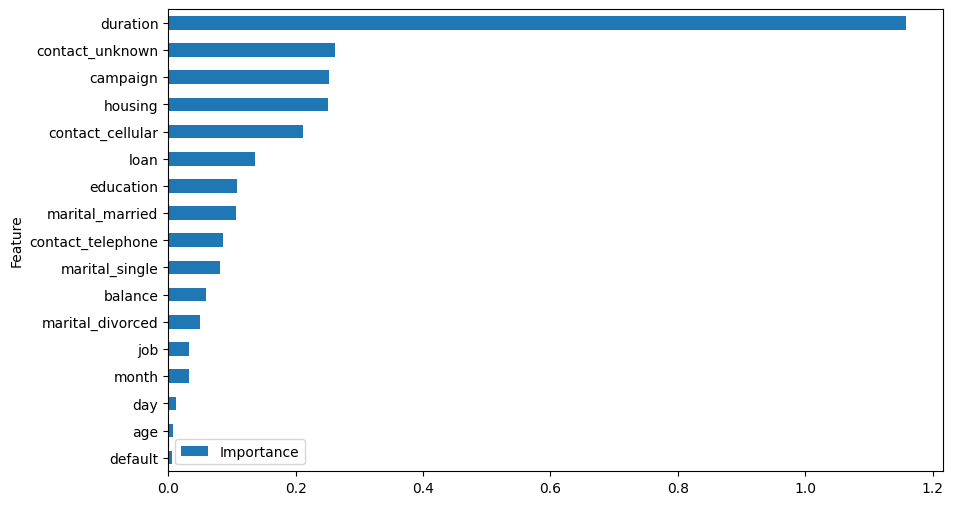

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

final_model.fit(X_train, y_train)

coefficients = final_model.coef_[0]
data = {'Feature': np.array(X.columns), 'Importance': np.abs(coefficients)}
feature_importance = pd.DataFrame(data)
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))


Refer above graph as 1.1

## SUMMARY:

<p style='text-align: justify;'> The purpose of the project was to find features that are important in improving the 
success rate for calls made to customers for any product that our clients offer. We are trying to decipher the success of a
marketing campaign where term deposit option is being provided to users. Not only are we trying to predict based on above
information whether a client will subscribe to a term deposit or not but also trying to find features which are most important
in predicting as to which segment of customers the client should prioritize </p>

### Goals ==> Strategies for solution

### Goal 1:
<p> Predicting a customer will opt to a term deposit or not. </p> 

**Solution Strategy:** Steps incorporated are as follows:

<p style='text-align: justify;'> a) <b><i> Data Cleaning and Preprocessing: </b></i> Firstly, the dataset was explored to understand the data better. It was seen that the dataset is large and it is moderately imbalanced. We went ahead with creating a model and it did generalize well. So did not undertake any sampling techniques. </p>

<p> b) <b><i> ML Model Selection: </b></i> We proceeded to selection of a baseline Machine Learning model. </p>
<p style='text-align: justify;'> The problem is a Supervised learning problem falling into the subset of binary classification. Such problems can be solved with the help of a number of ML models like Logistic Regression, Support Vector Machine, Decision tree, Random Forest, XGBoost. etc. </p>
<p style='text-align: justify;'> And thus, all above listed models were tried without explicit hyperparameters set as we are initially looking for a baseline model which gives us a good accuracy score. This can later be adjusted through hyperparameter tuning to increase the accuracy score, and thus helping us in finding the optimal learning algorithm. </p>  

Algorithms Tried with resultant Training and Test Accuracy scores:
1) LogisticRegression	    93.38% 	93.19%
2) XGBClassifier	        97.81%	93.55%
3) SVC              	    92.83%	92.87%
4) DecisionTreeClassifier	100%	91.37%
5) RandomForestClassifier	99.99%	93.61%

Here we found that all the models were working pretty well. So we went ahead with the <b> Logistic Regression </b> model as 
* it is <u><i>quicker</i></u> - taking less amount of time
* more <u><i>interpretable</i></u> - easier to interpret as a linear model
* <u><i>less complex</i></u> than the decision tree based models. 

Finally, we also applied **cross validation** to be further confident in the performance of our model as the entire data set is considered. It gave us **resultant accuracy as 93.25%** which was almost equal to the training accuracy 93.19% showing that this logistic regression model with l2 regularization is a great model as <u><i> it is generalizing well</i><u>.

### Goal 2:
<p> To determine the segment(s) of customers our client should prioritize. What makes the customers buy?</p>
<p> Finding segment(s) of customers our client should prioritize </p> 

**Solution**:

a) **Feature Selection**

It can be done by finding feature importance. We have a great fitting **Logistic regression model with 93.25% accuracy** after KFold Validation. The logistic regression model is a parametric model that estimates the coefficients for each feature in order to maximize the likelihood of the observed data. Hence, the <u>important features</u> are deduced from the **magnitude of the coefficents** for each feature.

Referring to Graph 1.1, 
we can see that the **Most important features** of above dataset are:
1) **duration** - last contact duration, in seconds
2) **campaign** - number of contacts performed during this campaign and for this client
3) **housing** - has a housing loan
4) **loan**  - has personal loan
5) **education** - education attained
6) **marital** - marital status
7) **balance** - average yearly balance
8) **job** - those who have a job

For **Segment of customers selection** all features are pretty clear , just cross checking for the ordinal categorical variable education and job,categorywise:

<Figure size 700x700 with 0 Axes>

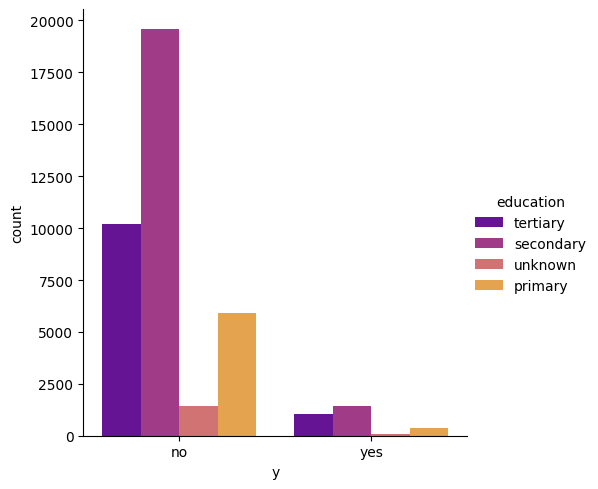

<Figure size 700x700 with 0 Axes>

In [75]:
sns.catplot(x = 'y', kind = 'count', hue = 'education', data = df, palette = 'plasma')
plt.figure(figsize = (7,7))


<Figure size 1000x1000 with 0 Axes>

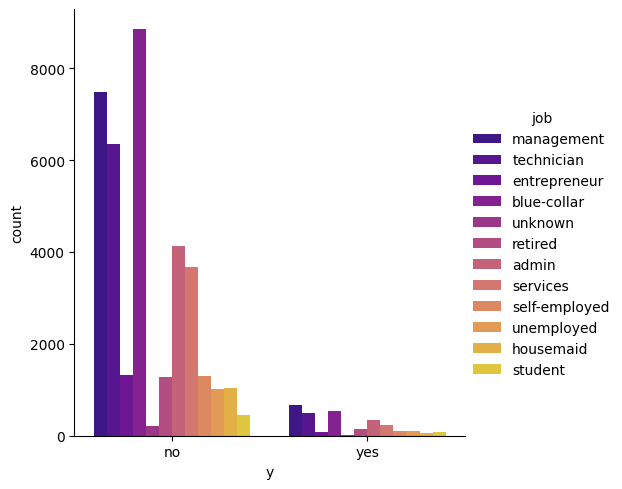

<Figure size 1000x1000 with 0 Axes>

In [77]:
sns.catplot(x = 'y', kind = 'count', hue = 'job', data = df, palette = 'plasma')
plt.figure(figsize = (10,10))

b) The **Segments of Customers** we should prioritize are:

1) the ones for whom the **calls** were contacted **more** often and for **longer duration**
2) the customers who already **have an existing loan** (either a housing loan or another personal loan)
3) the marital status is 
    1) **married** primarily. 
    2) then **single** (but not divorced)
4) the education 
     1) the customers who have **Secondary education** are most likely to opt for a term deposit
     2) the customers who have **Tertiary education** are second most likely to subscribe to term deposit
5) balance ,ie, the **yearly balance** should be more 
6) the job
    1) Customers in Management, technicians, blue-collar and admin jobs are most likely to go for opting for a term deposit.
    
<i>Thus, these above segments can be prioritized for maximum successful sales of the investment product. </i>